In [1]:
import pandas as pd

MOEX = '/kaggle/input/moex-shares-prices-since-2004/MOEX_shares_prices.csv'
df = pd.read_csv(filepath_or_buffer=MOEX, parse_dates=['tradedate']).dropna()
df['year'] = df['tradedate'].dt.year
df.head()

,secid,isin,tradedate,open,close,high,low,volume,year
6,EESR,RU0008959655,2004-01-05,8.174,8.518,8.533,8.143,381768700,2004
7,EESRP,RU0009029532,2004-01-05,7.477,7.573,7.575,7.206,2638400,2004
9,IRGZ,RU0008960828,2004-01-05,3.400,3.490,3.490,3.381,443300,2004
14,LKOH,RU0009024277,2004-01-05,681.050,718.020,718.850,681.050,1496859,2004
17,MSNG,RU0008958863,2004-01-05,1.963,2.039,2.039,1.963,86890100,2004


How much data do we have?

In [2]:
df.shape

(1274342, 9)

We have a lot of data. How many issues do we have?

In [3]:
df['isin'].nunique()

1199

Let's pick out RTKM, a Russian telecommunications company, and one of the largest-cap issues on the exchange.

In [4]:
rtkm_df = df[df['secid'] == 'RTKM'].copy()
rtkm_df.head()

,secid,isin,tradedate,open,close,high,low,volume,year
21,RTKM,RU0008943394,2004-01-05,61.00,62.50,62.60,60.33,6443263,2004
190,RTKM,RU0008943394,2004-01-06,63.21,63.10,63.70,62.60,9532057,2004
359,RTKM,RU0008943394,2004-01-08,62.95,62.50,63.00,62.06,6475271,2004
528,RTKM,RU0008943394,2004-01-09,62.98,64.09,64.15,62.60,11897163,2004
697,RTKM,RU0008943394,2004-01-12,64.35,62.51,64.48,62.51,6648266,2004


<Axes: xlabel='tradedate', ylabel='close'>

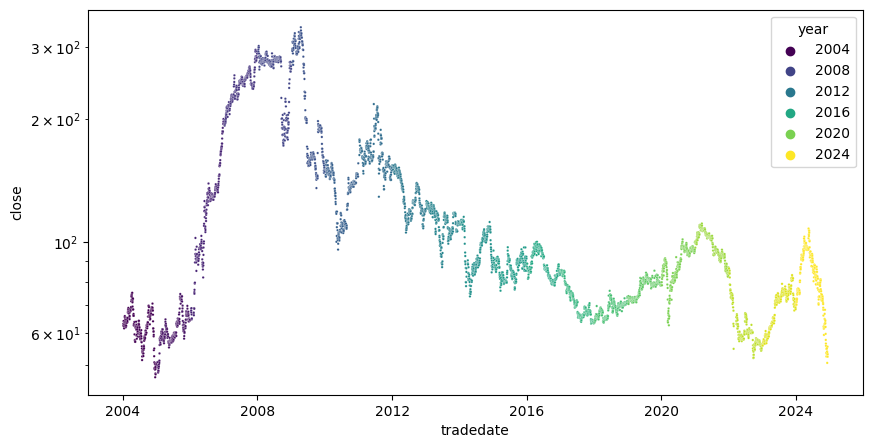

In [5]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (10, 5)
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=rtkm_df, x='tradedate', y='close', hue='year', s=3, palette='viridis')

What do we see? We see a big price run-up through about 2009, and a general downward trend since then.

Let's look at the price-volume correlations.

In [6]:
rtkm_df[['close', 'volume']].corr()

,close,volume
close,1.000000,-0.114199
volume,-0.114199,1.000000


We see a small negative correlation between price and volume. Let's try graphing them against each other to see what that looks like daily.

<Axes: xlabel='close', ylabel='volume'>

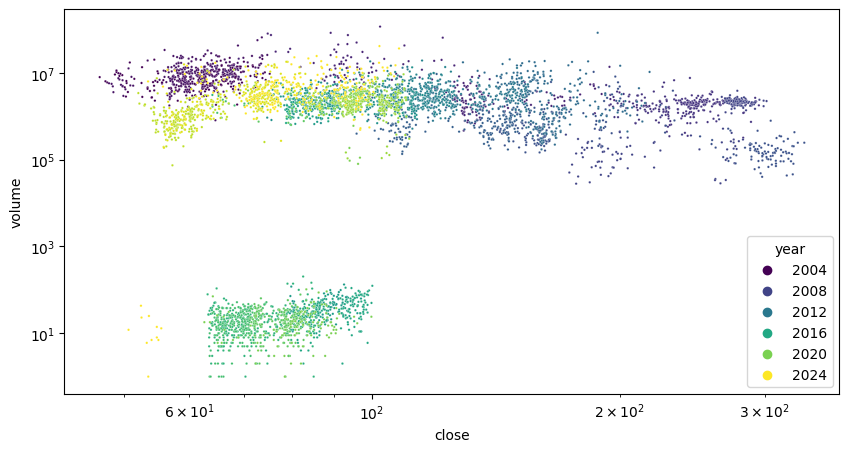

In [7]:
plt.figure(figsize=FIGSIZE)
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=rtkm_df, x='close', y='volume', hue='year', s=3, palette='viridis')

What do we see? If we plot the log of the volume as a function of the log of the price, we see a mostly linear relationship with maybe a slight downward slope, but also some very odd-looking volume counts in about 2020.